In [4]:
#This data analysis is mainly based on the Udemy course 
#Learning Python for Data Analysis and Visualization
# Numpy and Pandas imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import DataFrame, Series

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline
#data is available on Kaggle

In [5]:
titanic_df=pd.read_csv("train.csv")

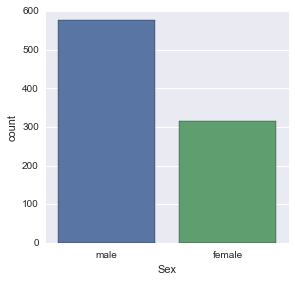

In [8]:
#How many individuals of each sex were present on the Titanic?
sns.factorplot('Sex',data=titanic_df,kind='count') 

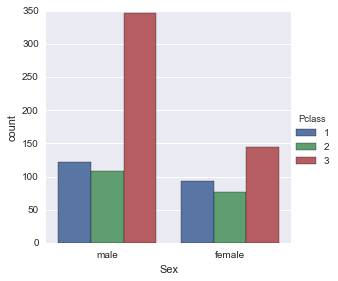

In [9]:
#In which class were they traveling? Gender VS number of travelers hued by class
sns.factorplot("Sex",data=titanic_df,hue="Pclass",kind="count")

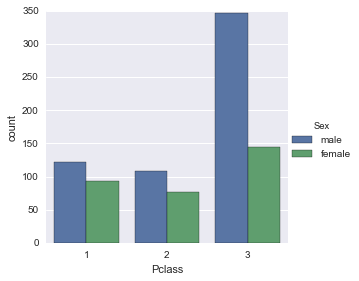

In [10]:
#traveling class VS number of traveler split hued by gender 
sns.factorplot("Pclass",data=titanic_df,hue="Sex",kind="count")

In [11]:
#defining child as person under 16
def male_female_child(passenger):
    age,sex=passenger
    if age< 16:
        return"child"
    else:
        return sex

In [12]:
titanic_df["person"] = titanic_df[["Age","Sex"]].apply(male_female_child,axis=1)

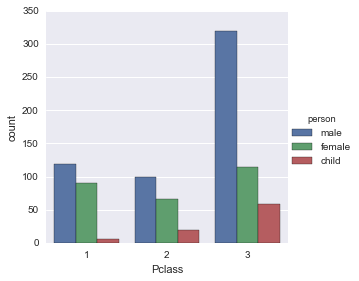

In [14]:
#population count in each class hued by gender/age
sns.factorplot("Pclass",data = titanic_df,hue="person",kind="count")
#mainly male people, mainly in third class, more children in lower class, female number relatively constant in 3 classes.

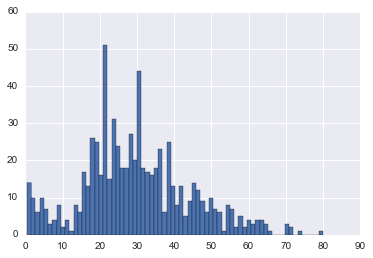

In [15]:
# histo Age Titanic passengers population
titanic_df["Age"].hist(bins=70)

In [16]:
titanic_df["Age"].mean()

29.69911764705882

In [17]:
titanic_df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\Consultant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


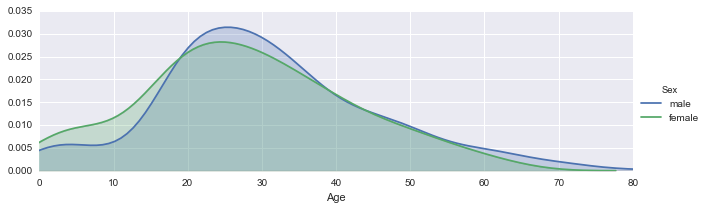

In [18]:
#KDE of passenger population age hued by gender
fig = sns.FacetGrid(titanic_df,hue="Sex",aspect=3)
fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\Consultant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


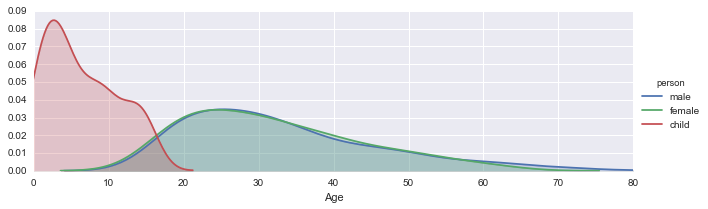

In [19]:
#same KDE with children isolated
fig = sns.FacetGrid(titanic_df,hue="person",aspect=3)
fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\Consultant\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


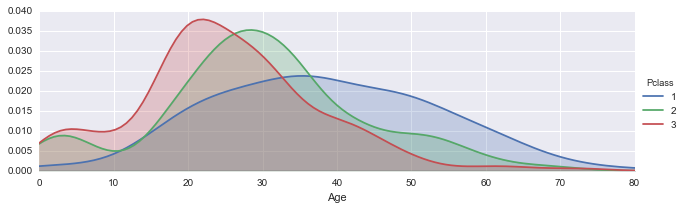

In [20]:
#KDE of population age hued by class
fig = sns.FacetGrid(titanic_df,hue="Pclass",aspect=3)
fig.map(sns.kdeplot,"Age",shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [22]:
#remove unaccounted people from table
deck = titanic_df["Cabin"].dropna()

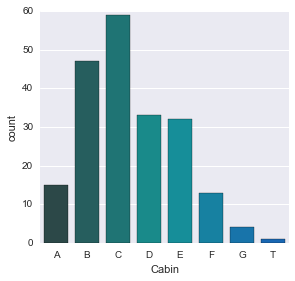

In [61]:
#create levels table 
levels = []
#isolate first letter of deck reference and list it in levels
for level in deck:
    levels.append(level[0])
#new DF based on levels index. List of deck letter
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
sns.factorplot("Cabin", data= cabin_df,palette="winter_d",kind = "count",order=['A','B','C',"D","E","F","G","T"])

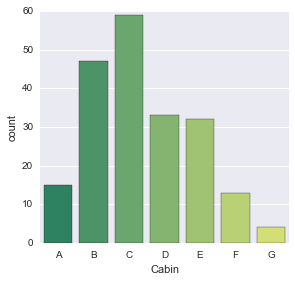

In [25]:
#remove inexistant T deck
cabin_df=cabin_df[cabin_df.Cabin !="T"]
sns.factorplot("Cabin", data= cabin_df,palette="summer",kind = "count",order=['A','B','C',"D","E","F","G"])

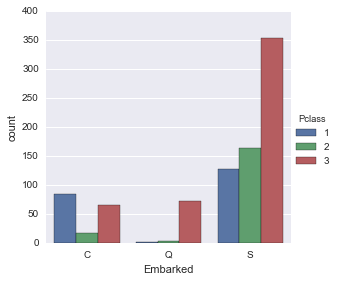

In [27]:
# Histo count of passengers on each stop hued by class
sns.factorplot("Embarked",data=titanic_df, kind="count",hue="Pclass",order = ["C","Q","S"])

In [28]:
# Question : Who was alone vs family?

In [30]:
titanic_df["Alone"]= titanic_df.SibSp+titanic_df.Parch

In [36]:
titanic_df["Alone"].loc[titanic_df["Alone"]>0] = "With Family"
titanic_df["Alone"].loc[titanic_df["Alone"]==0] = "Alone"

C:\Users\Consultant\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


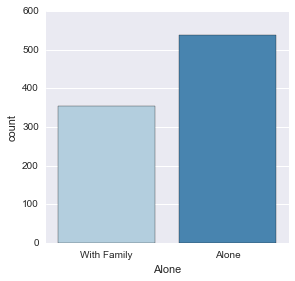

In [38]:
sns.factorplot("Alone", data=titanic_df,palette="Blues",kind="count")

In [39]:
#Who Survived? Who were they?
titanic_df["Survivor"]=titanic_df.Survived.map({0:"no",1:"yes"})

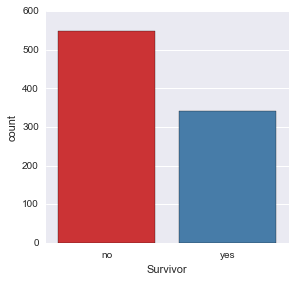

In [42]:
sns.factorplot("Survivor",data=titanic_df, palette="Set1",kind="count")

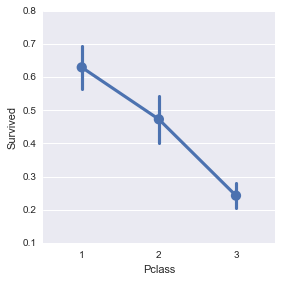

In [43]:
sns.factorplot("Pclass","Survived",data=titanic_df)

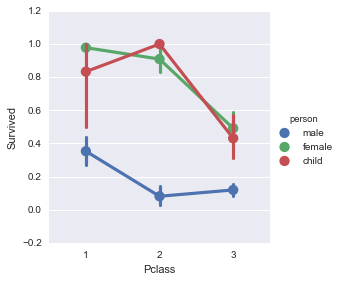

In [44]:
sns.factorplot("Pclass","Survived",hue="person",data=titanic_df)

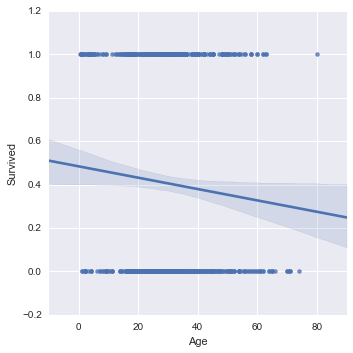

In [52]:
#define plot size in inches (width, height) & resolution(DPI)
fig = plt.figure(figsize=(4, 5), dpi=100)
sns.lmplot("Age","Survived",data=titanic_df)


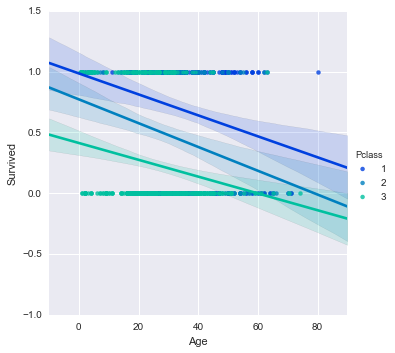

In [54]:
sns.lmplot("Age","Survived",hue ="Pclass" ,palette = "winter",data=titanic_df)

In [55]:
generations = [10,20,30,40,60,80]

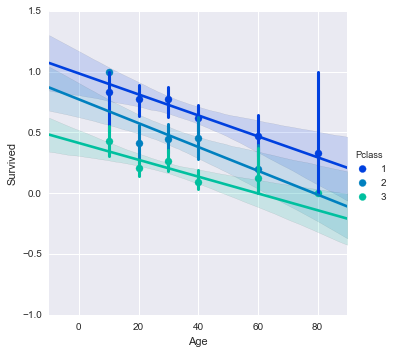

In [56]:
sns.lmplot("Age","Survived",hue="Pclass", 
           data = titanic_df, palette="winter",
           x_bins= generations)

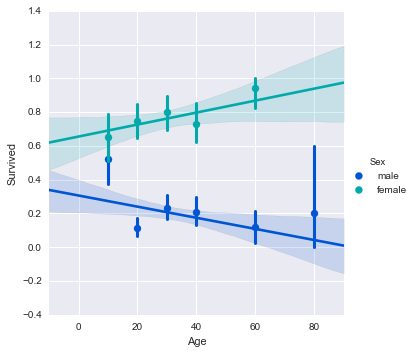

In [59]:
sns.lmplot("Age","Survived",hue="Sex",data=titanic_df, palette="winter",x_bins=generations)

In [87]:
titanic_df = pd.concat([titanic_df, cabin_df],axis=1)

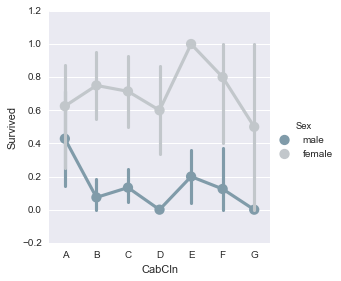

In [105]:
sns.factorplot("CabCln","Survived",hue = "Sex",data=titanic_df, palette="RdBu_d",order = list("ABCDEFG"))

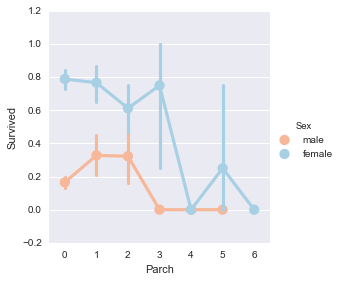

In [107]:
sns.factorplot("Parch","Survived",hue = "Sex",data=titanic_df, palette="RdBu")